In [2]:
from google.colab import files
files.upload()  #this will prompt you to upload the kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ikardi","key":"264a9c66b28395e16d9a85a2316a4b00"}'}

In [3]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json  # set permission

kaggle.json


In [4]:
!kaggle competitions download -c cifar-10

  0% 0.00/3.04M [00:00<?, ?B/s]
100% 3.04M/3.04M [00:00<00:00, 95.2MB/s]
 98% 596M/610M [00:05<00:00, 129MB/s]
100% 610M/610M [00:05<00:00, 116MB/s]
 85% 89.0M/105M [00:03<00:00, 19.8MB/s]
100% 105M/105M [00:03<00:00, 29.8MB/s] 
  0% 0.00/575k [00:00<?, ?B/s]
100% 575k/575k [00:00<00:00, 173MB/s]


Using TensorFlow backend.


170500096/170498071 [==============================] - 4s 0us/step


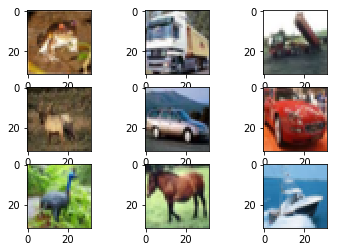

In [8]:
# Plot ad hoc CIFAR10 instances
from keras.datasets import cifar10
from matplotlib import pyplot
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# create a grid of 3x3 images
for i in range(0, 9):
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(X_train[i])
# show the plot
pyplot.show()

In [0]:
# Simple CNN model for CIFAR-10
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [0]:
...
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [0]:
...
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [0]:
...
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [13]:
# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               4194816  

In [14]:
...
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 287s 6ms/step - loss: 1.6976 - acc: 0.3871 - val_loss: 1.4113 - val_acc: 0.5062
Epoch 2/25
50000/50000 [==============================] - 273s 5ms/step - loss: 1.3529 - acc: 0.5134 - val_loss: 1.2376 - val_acc: 0.5490
Epoch 3/25
50000/50000 [==============================] - 266s 5ms/step - loss: 1.1810 - acc: 0.5749 - val_loss: 1.0848 - val_acc: 0.6097
Epoch 4/25
50000/50000 [==============================] - 288s 6ms/step - loss: 1.0550 - acc: 0.6247 - val_loss: 1.0665 - val_acc: 0.6156
Epoch 5/25
50000/50000 [==============================] - 284s 6ms/step - loss: 0.9580 - acc: 0.6598 - val_loss: 0.9738 - val_acc: 0.6571
Epoch 6/25
50000/50000 [==============================] - 283s 6ms/step - loss: 0.8685 - acc: 0.6923 - val_loss: 0.9544 - val_acc: 0.6660
Epoch 7/25
50000/50000 [====

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)

X_train (50000, 32, 32, 3)
X_test (10000, 32, 32, 3)


In [0]:
#VGG
np.random.seed(0)
weight_decay = 0.0005
def creat_model():
    model = Sequential()
    model.add(Conv2D(32, (3,3), padding='same',data_format="channels_first", input_shape=X_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3,3), padding='same',data_format="channels_first",))
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(64, (3,3), padding='same',data_format="channels_first", kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3,3), padding='same',data_format="channels_first", kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    model.add(Conv2D(128, (3,3), padding='same',data_format="channels_first", kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3,3), padding='same',data_format="channels_first", kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.7))
    
    model.add(Conv2D(256, (3, 3), padding='same',data_format="channels_first",kernel_initializer='TruncatedNormal', kernel_regularizer=regularizers.l2(weight_decay))) 
    model.add(Activation('relu'))
    model.add(Conv2D(256, (3, 3),data_format="channels_first",kernel_initializer='TruncatedNormal', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.7)) 

    model.add(Flatten())
    
    model.add(Dense(num_classes, activation='softmax'))
    opt = Adam(lr = 0.001, beta_1=0.9, beta_2=0.999) # try momentum 
    #opt=rmsprop(lr=0.001,decay=1e-6)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics =['accuracy'])
    model.summary()
    return model 

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential,Model, load_model
from keras import losses
from keras import initializers
from keras.layers import Activation ,Dropout ,Flatten,Dense
from keras.layers.convolutional import Conv2D, MaxPooling2D ,ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam,rmsprop
from keras import regularizers 
# from keras.callbacks import ModelCheckpoint ,History 
from keras.constraints import maxnorm
from keras.preprocessing.image import ImageDataGenerator

In [33]:
batch_size = 128
num_classes = 10 
epochs =25

# Augmentation Data 
# def create_datagen(X_train):
#     data_generator = ImageDataGenerator(
#     rotation_range=15,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     horizontal_flip=True,
#     )
#     data_generator.fit(X_train)
#     return data_generator

# data_generator=create_datagen(X_train) 

# checkpoint_path= 'weights.{epoch:02d}-{val_loss:.2f}.hdf5'
# #Create checkpoint callback
# checkpoint = ModelCheckpoint(checkpoint_path,monitor='val_loss',verbose=0,save_best_only=True,
#                             save_weights_only=True,
#                             mode='min') 
model =creat_model() 

# cnn=model.fit_generator(data_generator.flow(X_train,Y_train, batch_size=batch_size),
#                     steps_per_epoch=len(X_train) // batch_size,
#                     epochs=epochs,
#                     validation_data=(X_valid,Y_valid),
#                     verbose=1)

cnn=model.fit(X_train, y_train, batch_size=batch_size,epochs=epochs, validation_data=(X_test, y_test),shuffle=True)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 32, 32, 3)         9248      
_________________________________________________________________
activation_33 (Activation)   (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 32, 32, 3)         9248      
_________________________________________________________________
activation_34 (Activation)   (None, 32, 32, 3)         0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 16, 16, 3)         0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 64, 16, 3)         9280      
_________________________________________________________________
activation_35 (Activation)   (None, 64, 16, 3)        

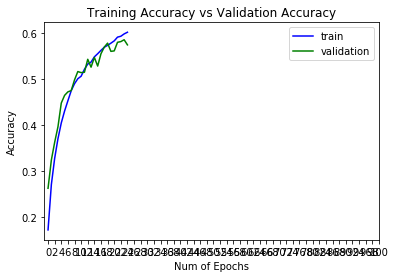

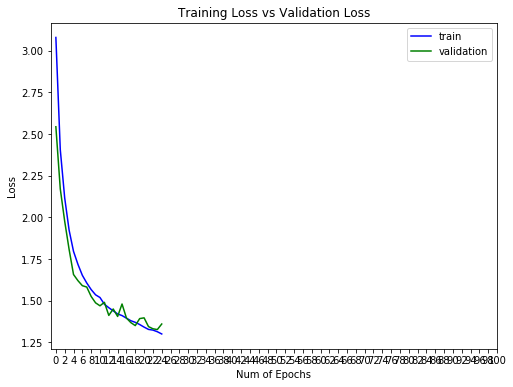

In [34]:
# Plots for training and testing process: loss and accuracy
 
plt.figure(0)
plt.plot(cnn.history['acc'],'b')
plt.plot(cnn.history['val_acc'],'g')
plt.xticks(np.arange(0, 101, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])
 
 
plt.figure(1)
plt.plot(cnn.history['loss'],'b')
plt.plot(cnn.history['val_loss'],'g')
plt.xticks(np.arange(0, 101, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
 
 
plt.show()

In [36]:
prediction =model.predict(X_test,verbose=1) 

10000/10000 [==============================] - 13s 1ms/step


In [62]:
import numpy as np
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
indx= np.argmax(prediction ,axis=1)
label= lb.fit_transform(np.array(indx))
label=lb.classes_
label

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [0]:
# creat the submition file 

data={'ID': np.arange(1,label.shape[0]+1),
       'Category': label}
predict= pd.DataFrame(data)
predict=predict[['ID','Category']]
predict.to_csv('submission.csv', index=False)